In [54]:
http://ais.informatik.uni-freiburg.de/teaching/ss12/robotics/slides/17-icp.pdf

SyntaxError: invalid syntax (<ipython-input-54-16e672dd8b1e>, line 1)

In [64]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from math import exp, log, sqrt
%matplotlib inline

In [56]:
data_folder = './data/task5/'

In [57]:
def centerize(points):
    xc, yc = np.mean(points, axis=0)
    center = np.array([xc, yc])
    points_c = points - center
    return center, points_c

[[15  5]
 [15 15]
 [15 25]
 [15 35]
 [15 45]
 [25 45]
 [35 45]]
[[ -4.28571429 -25.71428571]
 [ -4.28571429 -15.71428571]
 [ -4.28571429  -5.71428571]
 [ -4.28571429   4.28571429]
 [ -4.28571429  14.28571429]
 [  5.71428571  14.28571429]
 [ 15.71428571  14.28571429]]


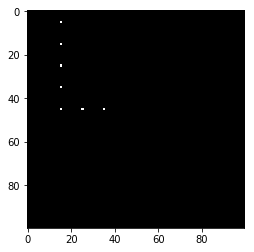

In [4]:
# load reference image
ref_image = cv2.imread(data_folder + '0.png')
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
plt.imshow(ref_image, cmap='gray')
ys, xs = np.nonzero(ref_image)
ref_points = np.transpose([xs, ys])
print(ref_points)
ref_center, ref_points = centerize(ref_points)
print(ref_points)

In [83]:
def draw_circles(image, points, color=(255, 0, 0)):
    new_image = image.copy()
    for p in points:
        t = (int(p[0]), int(p[1]))
        cv2.circle(new_image, t, 3, color, 1, cv2.LINE_AA)
    return new_image

In [72]:
c = 0.1

def weight(p1, p2):
    dist = np.linalg.norm(p1-p2)
    return exp(-c * dist**2)

min_weight = 1e-6
win_size = int(round(sqrt(-log(min_weight) / c)))
print(win_size)

12


In [80]:
def mean_shift(points, img):
    eps = 0.1
    shifted_points = points.copy()
    for i, p in enumerate(shifted_points):
        while True:
            a = np.zeros(2)
            b = 0
            for y in range(int(p[1]) - win_size, int(p[1]) + win_size + 1):
                for x in range(int(p[0]) - win_size, int(p[0]) + win_size + 1):
                    if x >= 0 and y >= 0 and x <= img.shape[1] and y <= img.shape[0]:
                        t = np.array([x, y])
                        w = weight(p, t) * img[y, x]
                        a += w * t
                        b += w
            new_p = a / b
            shift = np.linalg.norm(new_p - p)
            if shift < eps:
                break
            p = new_p
        shifted_points[i] = p
    return shifted_points

In [9]:
def match(points, ref_points):
    matching = []
    for p in points:
        matching.append(np.argmin([np.linalg.norm(np.subtract(rp, p)) for rp in ref_points]))
    return matching

In [114]:
def icp(points, img):
    center, points = centerize(points)
    
    P = np.transpose(points)
    base_points = ref_points
    matching = match(points, base_points)
    while True:
        print(matching)
        matched_points = np.array([base_points[i] for i in matching])
        Q = np.transpose(matched_points)
        S = np.dot(P, np.transpose(Q))
        U, W, V = np.linalg.svd(S)
        M = np.array([[1, 0], [0, np.linalg.det(np.dot(U, np.transpose(V)))]])
        R = np.dot(np.dot(U, M), np.transpose(V))
        base_points = np.transpose(np.dot(R, np.transpose(base_points)))
        new_matching = match(points, base_points)
        plt.figure()
        plt.imshow(draw_circles(img, [bp + center for bp in base_points], color=(0, 255, 0)))
        plt.show()
        if new_matching == matching:
            t = ref_center - np.dot(center, R)
            return R, t
        matching = new_matching

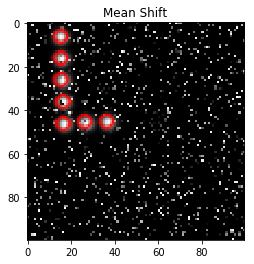

[0, 1, 2, 3, 4, 5, 6]


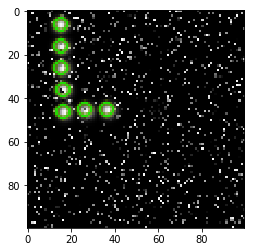

R [[ 0.99918115  0.04046033]
 [-0.04046033  0.99918115]]
t [ 0.07906747 -1.89012975]


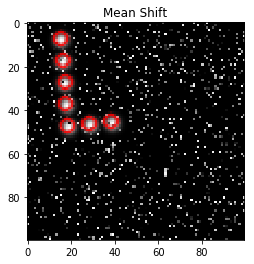

[0, 1, 2, 3, 4, 5, 6]


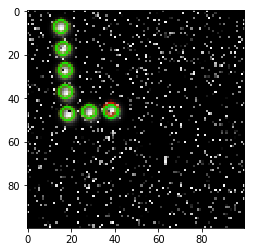

R [[ 0.99671449  0.0809952 ]
 [-0.0809952   0.99671449]]
t [ 0.27102315 -3.97652114]


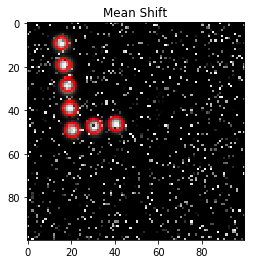

[0, 1, 2, 3, 4, 5, 6]


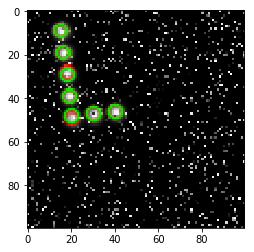

R [[ 0.99156777  0.12958917]
 [-0.12958917  0.99156777]]
t [ 0.91478162 -6.24041684]


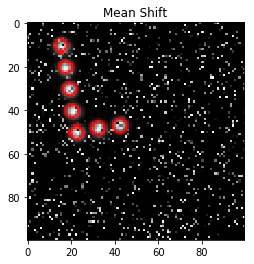

[0, 1, 2, 3, 4, 5, 6]


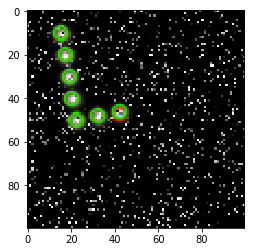

R [[ 0.98582007  0.16780582]
 [-0.16780582  0.98582007]]
t [ 1.39180555 -8.39245652]


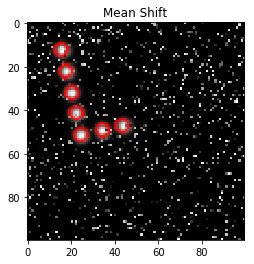

[0, 1, 2, 3, 4, 5, 6]


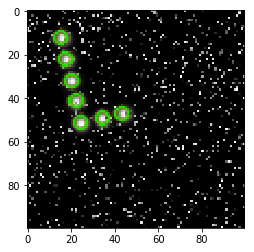

R [[ 0.97685695  0.21389366]
 [-0.21389366  0.97685695]]
t [  2.23258025 -10.58867293]


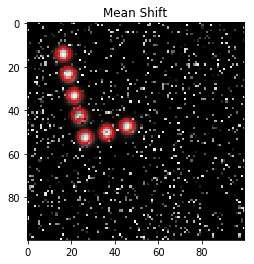

[0, 1, 2, 3, 4, 5, 6]


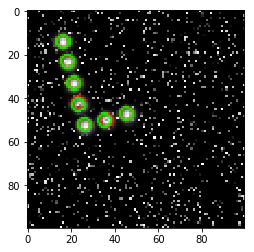

R [[ 0.96723458  0.25388436]
 [-0.25388436  0.96723458]]
t [  2.92551351 -12.66771162]


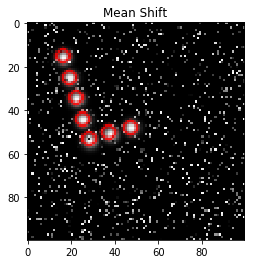

[0, 1, 2, 3, 4, 5, 6]


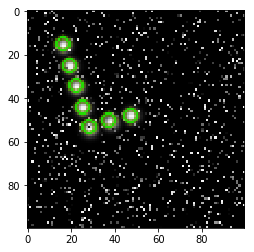

R [[ 0.95524541  0.29581447]
 [-0.29581447  0.95524541]]
t [  3.93189741 -14.90565202]


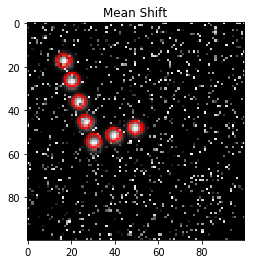

[0, 1, 2, 3, 5, 5, 6]


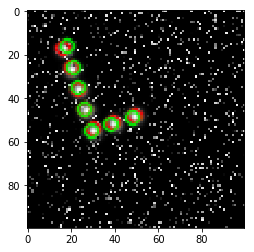

[0, 1, 2, 3, 4, 5, 6]


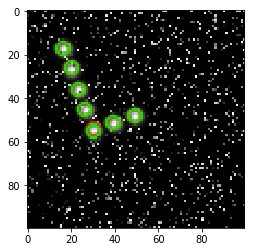

R [[ 0.99720505  0.07471344]
 [-0.07471344  0.99720505]]
t [ -7.12501202 -11.57393492]


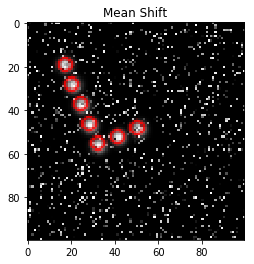

[0, 1, 2, 3, 5, 5, 6]


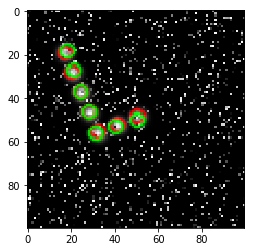

[0, 1, 2, 3, 4, 5, 6]


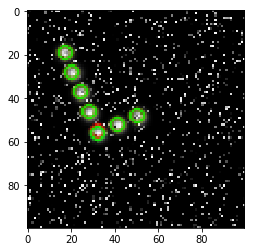

R [[ 0.99729198  0.07354392]
 [-0.07354392  0.99729198]]
t [ -8.41505454 -12.73218472]


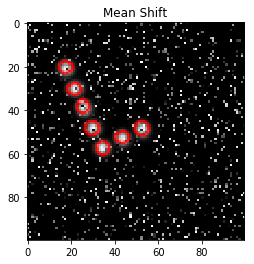

[0, 1, 2, 3, 5, 6, 6]


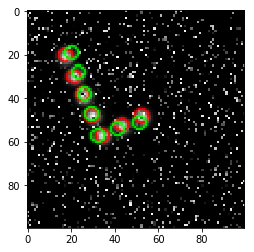

[0, 1, 2, 3, 4, 5, 6]


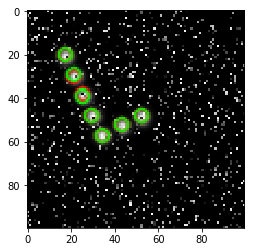

R [[ 0.98958056  0.14398029]
 [-0.14398029  0.98958056]]
t [ -6.33620104 -15.86811771]


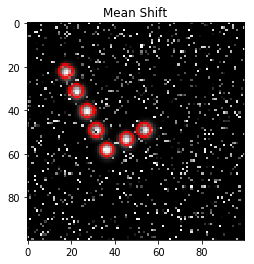

[0, 1, 2, 3, 5, 6, 6]


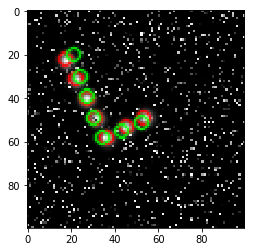

[0, 1, 2, 3, 4, 5, 6]


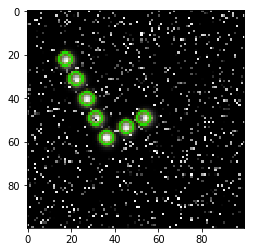

R [[ 0.98944834  0.14488614]
 [-0.14488614  0.98944834]]
t [ -7.49964973 -17.28374456]


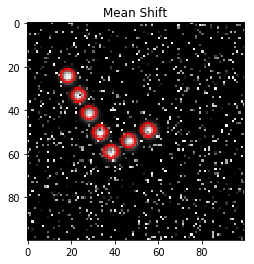

[1, 1, 2, 3, 5, 6, 6]


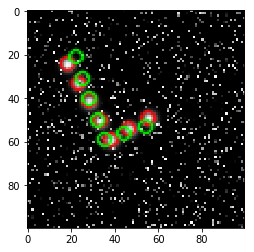

[0, 1, 2, 3, 4, 5, 6]


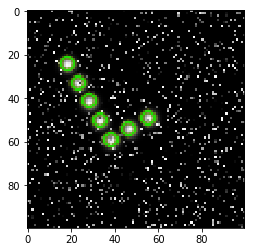

R [[ 0.98164338  0.19072566]
 [-0.19072566  0.98164338]]
t [ -6.35352202 -19.84264738]


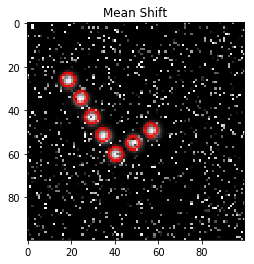

[1, 1, 2, 3, 5, 6, 6]


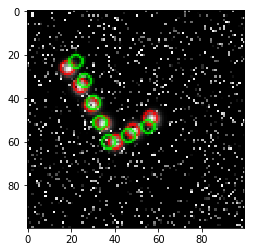

[0, 1, 2, 3, 4, 5, 6]


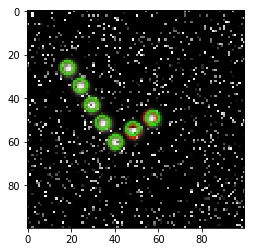

R [[ 0.98158749  0.19101311]
 [-0.19101311  0.98158749]]
t [ -7.40393938 -21.19984662]


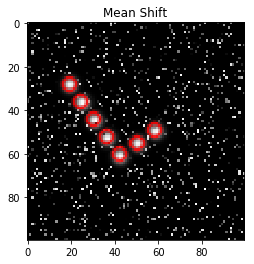

[1, 2, 2, 3, 5, 6, 6]


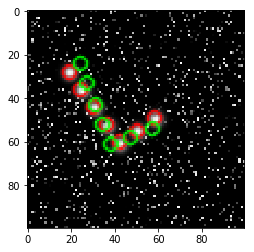

[0, 1, 2, 3, 4, 5, 6]


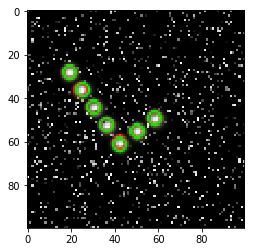

R [[ 0.97202275  0.23488673]
 [-0.23488673  0.97202275]]
t [ -6.12216807 -23.61384604]


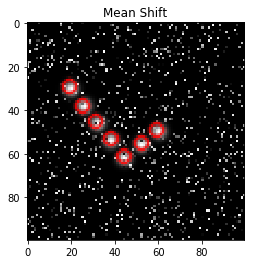

[1, 2, 2, 3, 5, 6, 6]


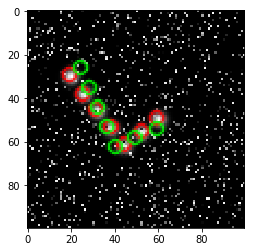

[0, 1, 2, 3, 4, 5, 6]


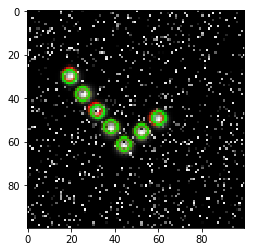

R [[ 0.97201064  0.23493683]
 [-0.23493683  0.97201064]]
t [ -7.25067647 -25.02859631]


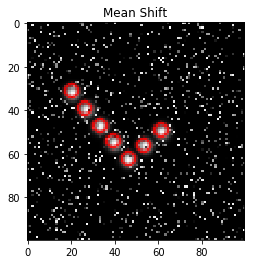

[1, 2, 2, 3, 5, 6, 6]


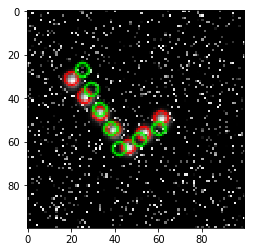

[0, 1, 2, 3, 4, 5, 6]


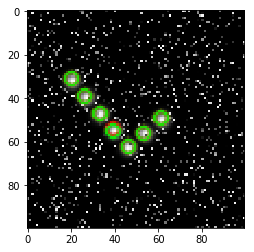

R [[ 0.97215968  0.23431937]
 [-0.23431937  0.97215968]]
t [ -8.34190729 -26.33903802]


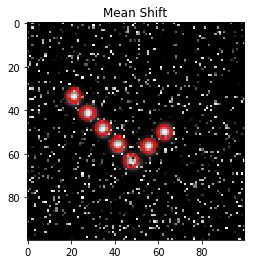

[1, 2, 2, 3, 5, 6, 6]


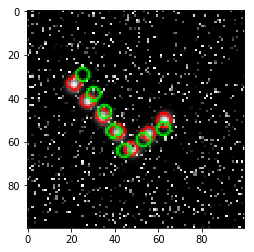

[0, 1, 2, 3, 4, 5, 6]


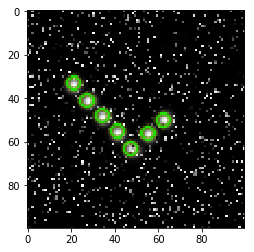

R [[ 0.97224921  0.23394758]
 [-0.23394758  0.97224921]]
t [ -9.45314459 -27.55338703]


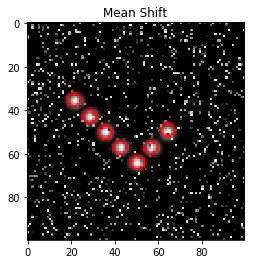

[1, 2, 2, 3, 5, 6, 6]


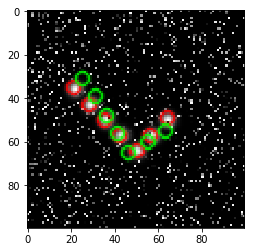

[0, 1, 2, 3, 4, 5, 6]


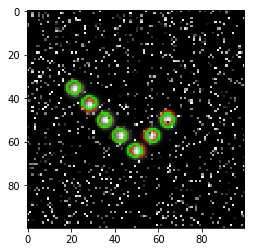

R [[ 0.97222122  0.23406387]
 [-0.23406387  0.97222122]]
t [-10.45029573 -28.95683971]


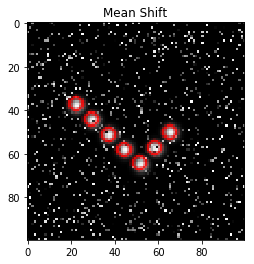

[1, 2, 3, 3, 5, 6, 6]


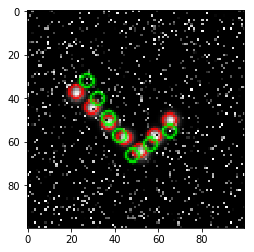

[0, 1, 2, 3, 4, 5, 6]


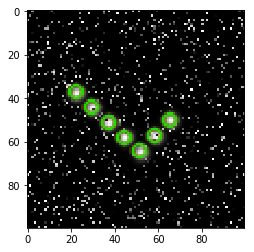

R [[ 0.96353889  0.26756832]
 [-0.26756832  0.96353889]]
t [ -9.4273582  -31.20220877]


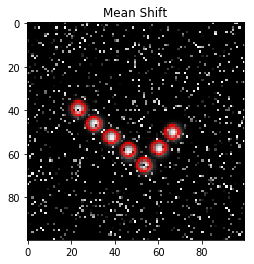

[1, 2, 3, 3, 5, 6, 6]


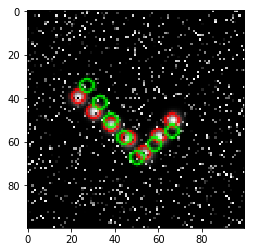

[0, 1, 2, 3, 4, 5, 6]


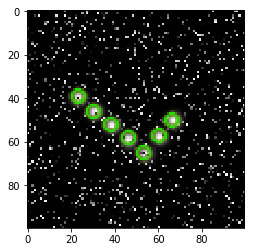

R [[ 0.96327506  0.2685166 ]
 [-0.2685166   0.96327506]]
t [-10.42147549 -32.53953685]


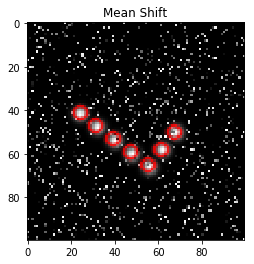

[1, 2, 3, 3, 5, 6, 6]


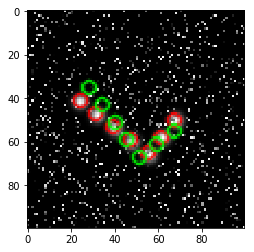

[0, 1, 2, 3, 4, 5, 6]


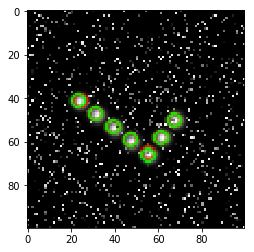

R [[ 0.96307229  0.26924293]
 [-0.26924293  0.96307229]]
t [-11.32134021 -33.81836573]


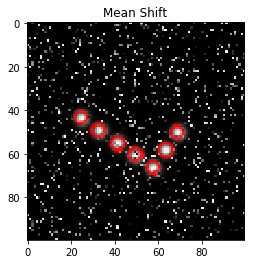

[1, 2, 3, 3, 5, 6, 6]


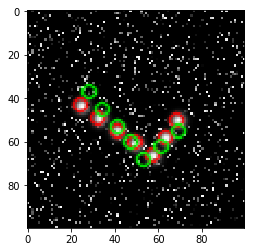

[0, 1, 2, 3, 4, 5, 6]


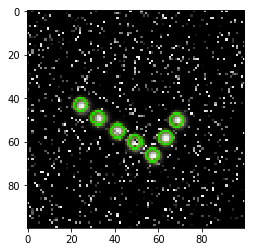

R [[ 0.96359004  0.26738405]
 [-0.26738405  0.96359004]]
t [-12.51405966 -35.07613889]


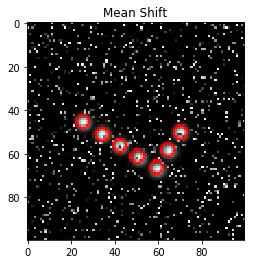

[2, 2, 3, 3, 5, 6, 6]


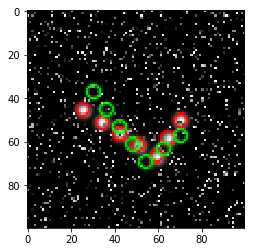

[0, 1, 2, 3, 5, 5, 6]


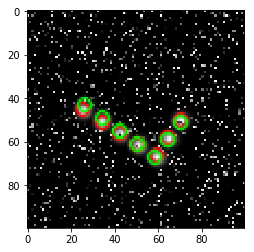

[0, 1, 2, 3, 4, 5, 6]


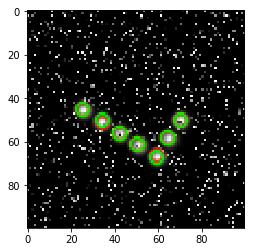

R [[ 0.99715663  0.07535684]
 [-0.07535684  0.99715663]]
t [-26.03991143 -28.59696698]


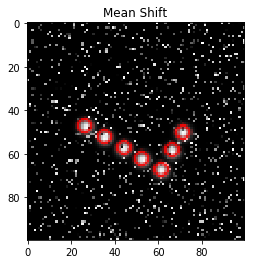

[2, 2, 3, 3, 5, 6, 6]


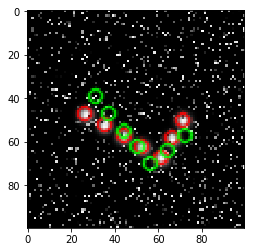

[0, 1, 2, 3, 5, 5, 6]


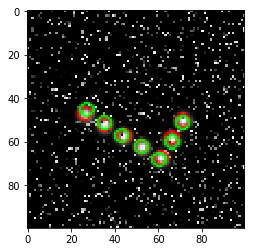

[0, 1, 2, 3, 4, 5, 6]


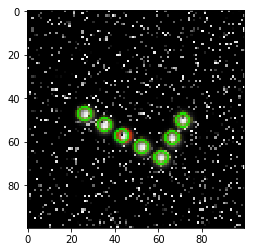

R [[ 0.9972125   0.07461383]
 [-0.07461383  0.9972125 ]]
t [-27.37141336 -29.68342676]


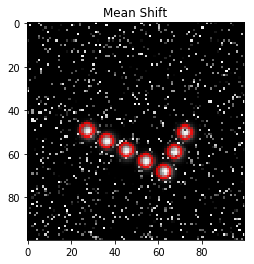

[2, 2, 3, 3, 6, 6, 6]


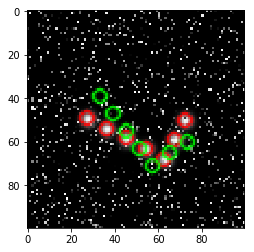

[0, 1, 2, 3, 5, 6, 6]


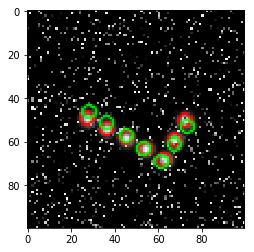

[0, 1, 2, 3, 4, 5, 6]


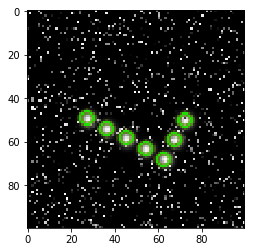

R [[ 0.98948068  0.14466508]
 [-0.14466508  0.98948068]]
t [-24.04916314 -33.89821752]


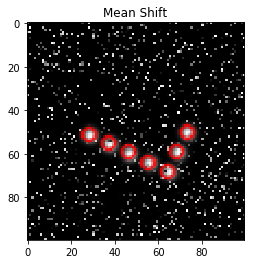

[2, 2, 3, 3, 6, 6, 6]


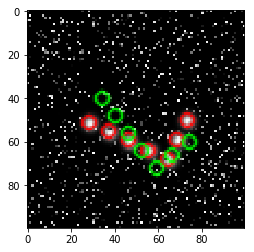

[0, 1, 2, 3, 5, 6, 6]


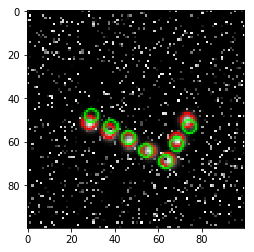

[0, 1, 2, 3, 4, 5, 6]


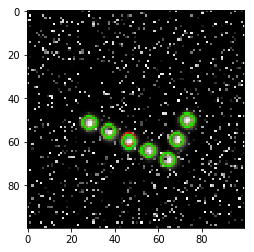

R [[ 0.98958949  0.14391888]
 [-0.14391888  0.98958949]]
t [-25.36334811 -34.93569014]


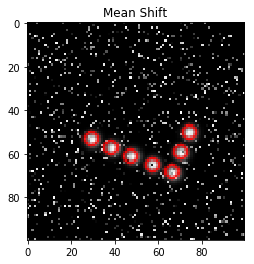

[2, 2, 3, 3, 6, 6, 6]


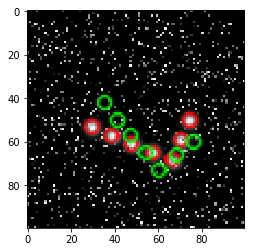

[0, 1, 2, 3, 5, 6, 6]


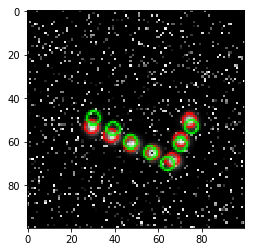

[0, 1, 2, 3, 4, 5, 6]


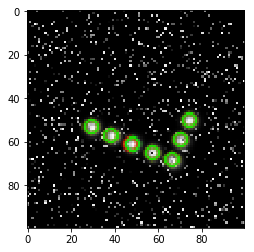

R [[ 0.98945485  0.14484161]
 [-0.14484161  0.98945485]]
t [-26.47332516 -36.03399427]


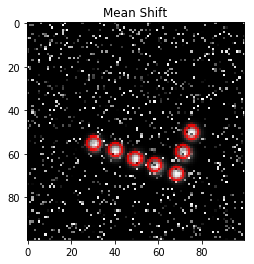

[2, 2, 3, 3, 6, 6, 2]


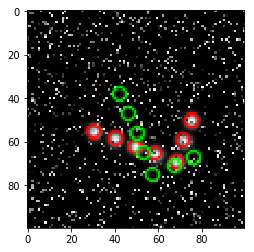

[1, 2, 2, 3, 5, 6, 6]


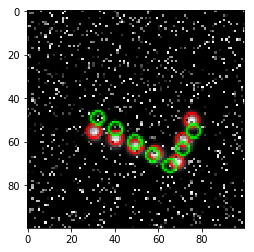

[0, 1, 2, 3, 4, 5, 6]


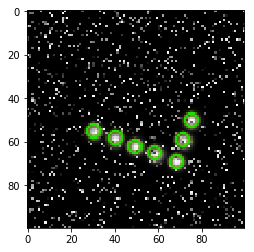

R [[ 0.9721602  0.2343172]
 [-0.2343172  0.9721602]]
t [-21.36620601 -41.08113903]


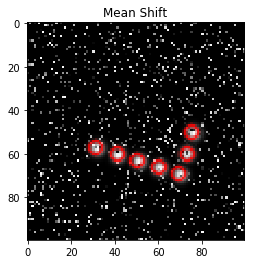

[2, 3, 3, 3, 6, 6, 2]


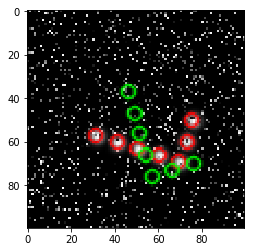

[2, 2, 3, 3, 5, 6, 6]


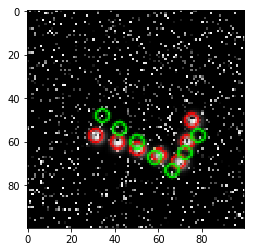

[0, 1, 2, 3, 5, 5, 6]


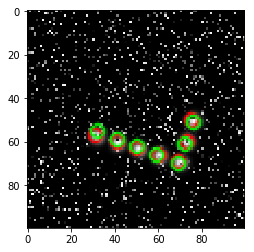

[0, 1, 2, 3, 4, 5, 6]


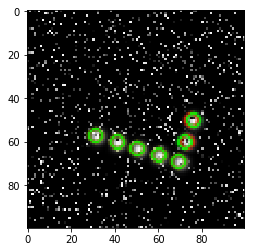

R [[ 0.99723169  0.07435693]
 [-0.07435693  0.99723169]]
t [-33.5709399  -34.51620902]


In [117]:
prev_points = ref_points + ref_center
for i in range(1, 30):
    img_rgb = cv2.imread(data_folder + str(i) + '.png')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) / 255
    points = mean_shift(prev_points, img_gray)
    img_rgb = draw_circles(img_rgb, points)
    plt.figure()
    plt.title('Mean Shift')
    plt.imshow(img_rgb)
    plt.show()
    prev_points = points
    
    R, t = icp(points, img_rgb)
    print('R', R)
    print('t', t)